In [1]:
def parse_file(path):
    with open(path) as f:
        lines = f.read().split('\n')
        measurments = {}
        for line in lines:
            if line == '':
                continue
            
            parts = line.replace('[', '').replace(']', '').split('|')
            n = int(parts[0])
            comps = list(map(lambda c: int(c), parts[1].split(', ')))
            measurments[n] = comps
        
        return measurments

In [2]:
import numpy as np

concentration_p = 0.9

def analyze(measurments, get_theoretical_mean):
    analysis = {}

    for n in measurments.keys():
        experimental_mean = np.mean(measurments[n])
        experimental_var = np.var(measurments[n])
        chebyshev_deviation = np.sqrt(experimental_var / concentration_p)

        analysis[n] = {
            'chebyshev_deviation': chebyshev_deviation,
            'chebyshev_up_bound': experimental_mean + chebyshev_deviation,
            'chebyshev_low_bound': experimental_mean - chebyshev_deviation,
            'experimental_var': experimental_var,
            'experimental_mean': experimental_mean,
            'theoretical_mean': get_theoretical_mean(n)
        }

    return analysis

In [3]:
import matplotlib.pyplot as plt

def main_plot(analysis):
    x = analysis.keys()
    
    def plot(key, **kw):
        plt.plot(x, list(map(lambda a: a[key], analysis.values())), **kw)

    plt.rcParams["figure.figsize"] = (20,10)
    plt.xlabel("Number of elements")
    plt.ylabel("Number of comparisons")

    plot("experimental_mean", label="Experimental")
    plot("theoretical_mean", label="Theoretical")
    plot("chebyshev_up_bound", label=f"Chebyshev bounds for p = {concentration_p}", linestyle="--", color="gray")
    plot("chebyshev_low_bound", label=None, linestyle="--", color="gray")

    plt.grid()
    plt.legend()

In [4]:
from itertools import groupby

step = 100

def histogram(n, measurments, analysis):
    plt.xlabel("Number of comparisons")
    plt.ylabel("Number of samples")
    
    mean = analysis[n]['experimental_mean']
    actual_deviation = analysis[n]['chebyshev_deviation']

    while True:
        samples_in_range = sum(m <= (mean + actual_deviation) and m >= (mean - actual_deviation) for m in measurments[n])
        if samples_in_range / len(measurments[n]) <= concentration_p:
            break
        else:
            actual_deviation -= 1

    plt.hist(measurments[n], bins=20)
    plt.axvline(x=mean, linestyle="--", color="red", label="Mean")
    plt.axvline(x=mean + actual_deviation, linestyle="--", color="orange", label=f"Actual bounds for p = {concentration_p}")
    plt.axvline(x=mean - actual_deviation, linestyle="--", color="orange")
    plt.axvline(x=analysis[n]['chebyshev_up_bound'], linestyle="--", color="gray", label=f"Chebyshev bounds for p = {concentration_p}")
    plt.axvline(x=analysis[n]['chebyshev_low_bound'], linestyle="--", color="gray")
   

    plt.grid()
    plt.legend()
    

In [5]:
qs_measurments = parse_file(".results/quick_sort.txt")

In [7]:
import math

def qs_theoretical(n):
    l = 0.577216
    return 2 * n * (math.log(n) + l - 2) + 2 * math.log(n) + 2 * l + 1 + 1 / n 

qs_analysis = analyze(qs_measurments, lambda n: 2 * n * math.log(n))

## QuickSort, Hoare, middle element as pivot

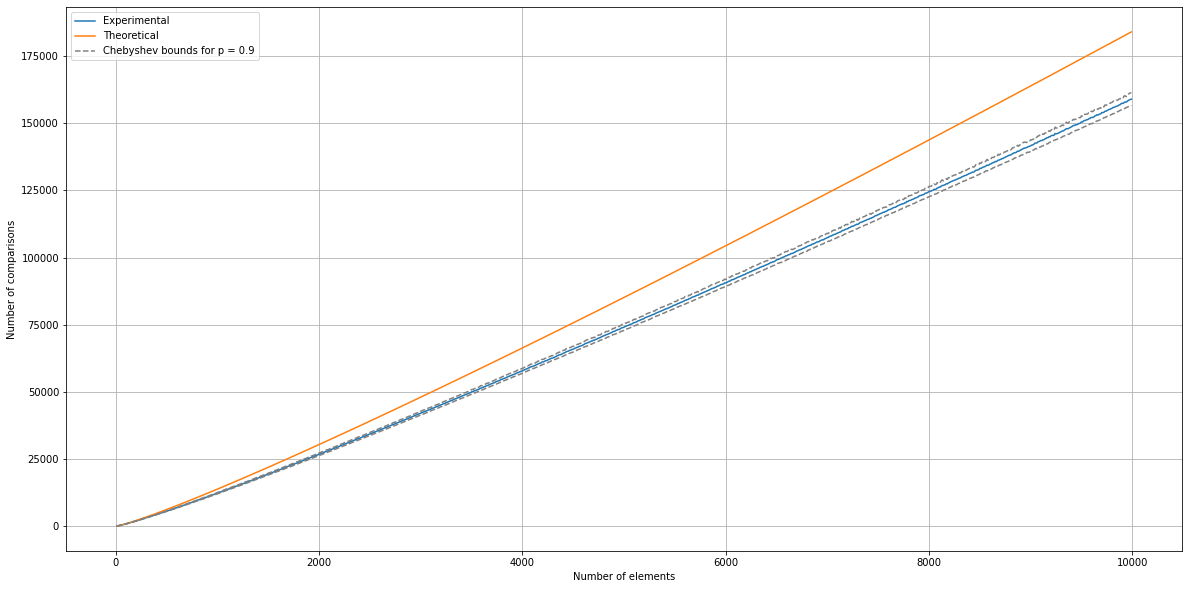

In [8]:
main_plot(qs_analysis)

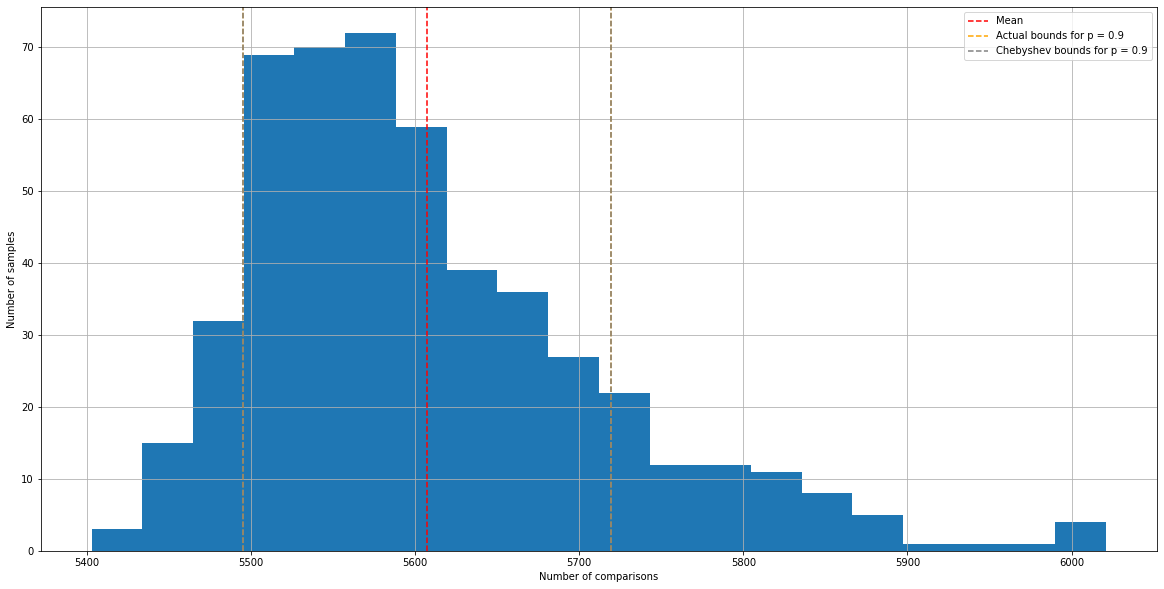

In [9]:
histogram(500, qs_measurments, qs_analysis)

In [10]:
qs2_measurments = parse_file(".results/quick_sort_2.txt")

In [11]:
qs2_analysis = analyze(qs2_measurments, lambda n: 2 * n * math.log(n))

## QuickSort, Hoare, first element as pivot

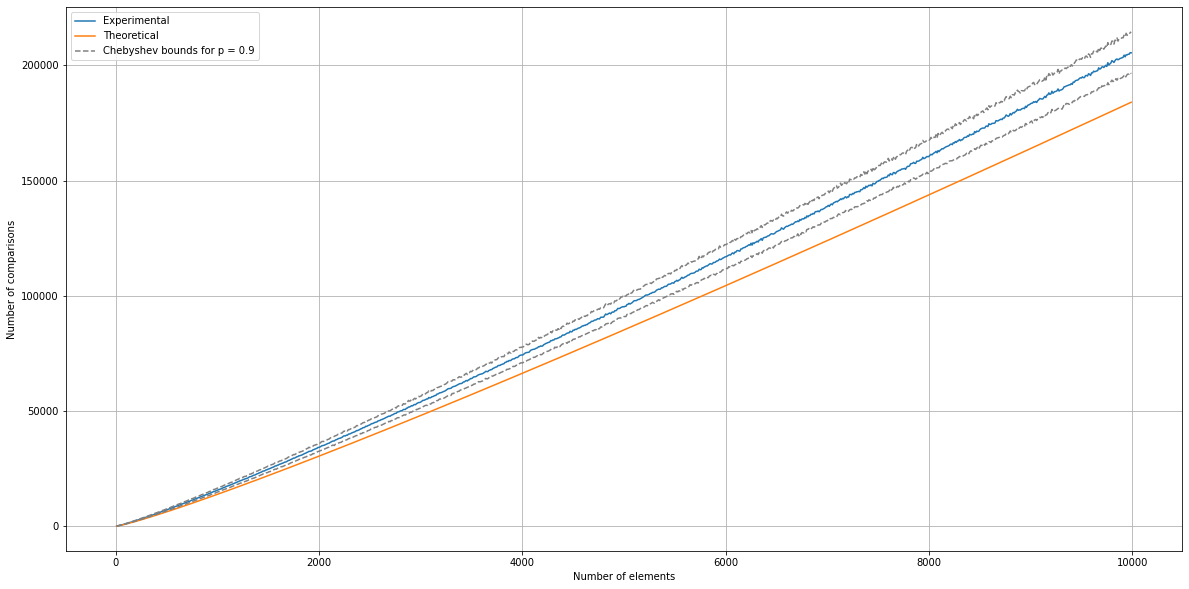

In [12]:
main_plot(qs2_analysis)

Var: 15801527.582837015


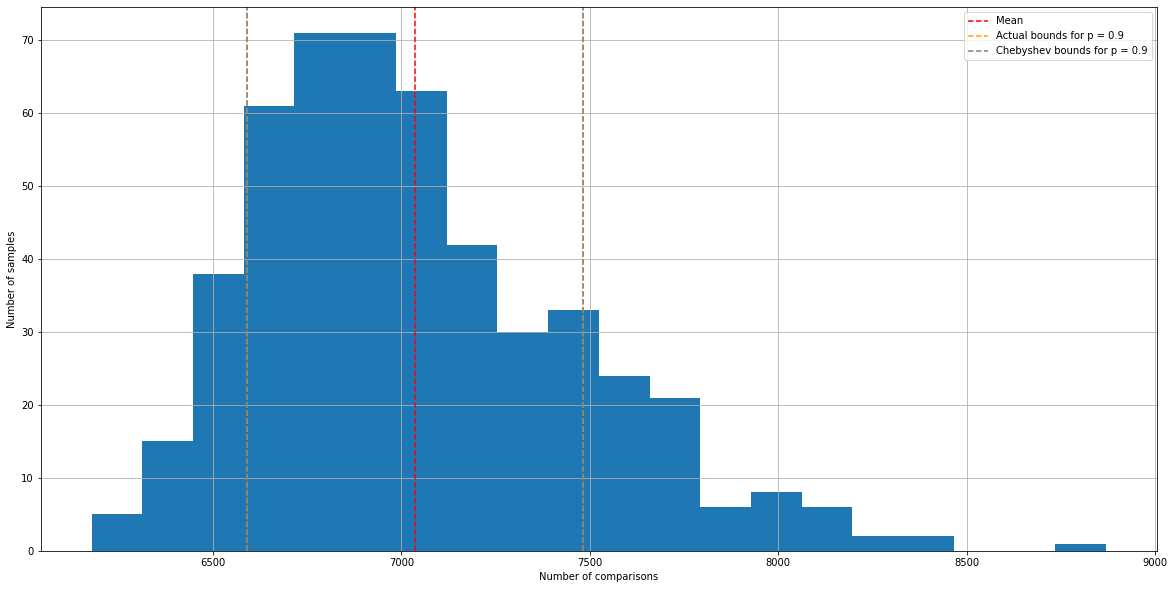

In [19]:
print(f"Var: {qs2_analysis[5000]['experimental_var']}")
histogram(500, qs2_measurments, qs2_analysis)

In [14]:
ms_measurments = parse_file(".results/merge_sort.txt")

In [15]:
import math

def ms_theoretical(n):
    worst = n * math.ceil(math.log2(n)) - 2 ** (math.ceil(math.log2(n))) + 1
    return worst - (n * 0.2645)
    
ms_analysis = analyze(ms_measurments, ms_theoretical)

## MergeSort

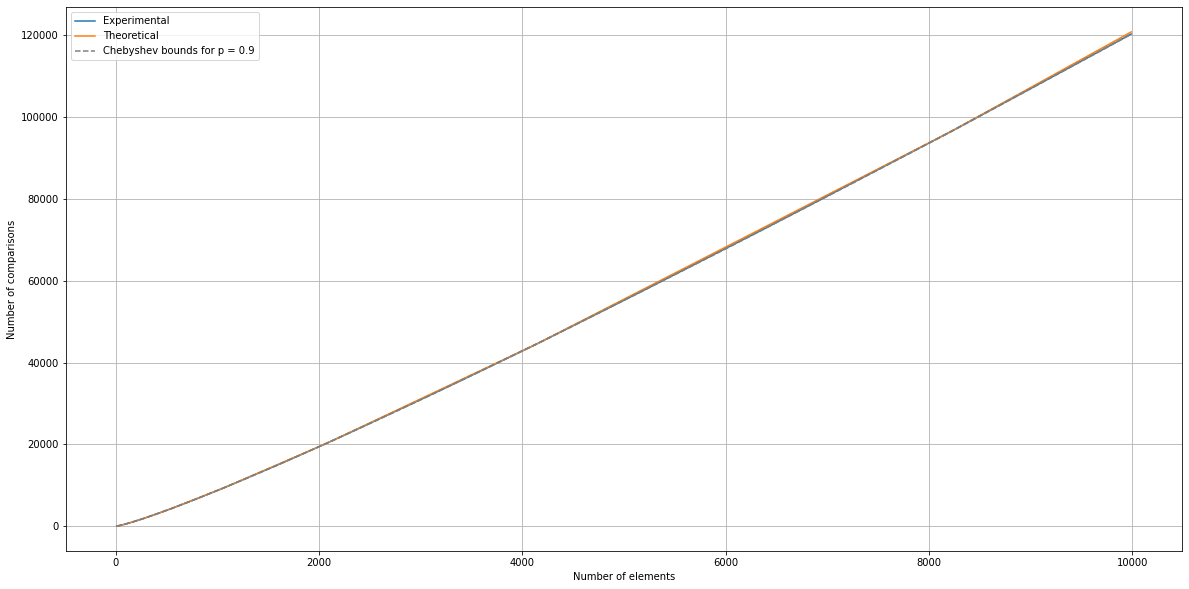

In [16]:
main_plot(ms_analysis)

Var: 1712.930815538893


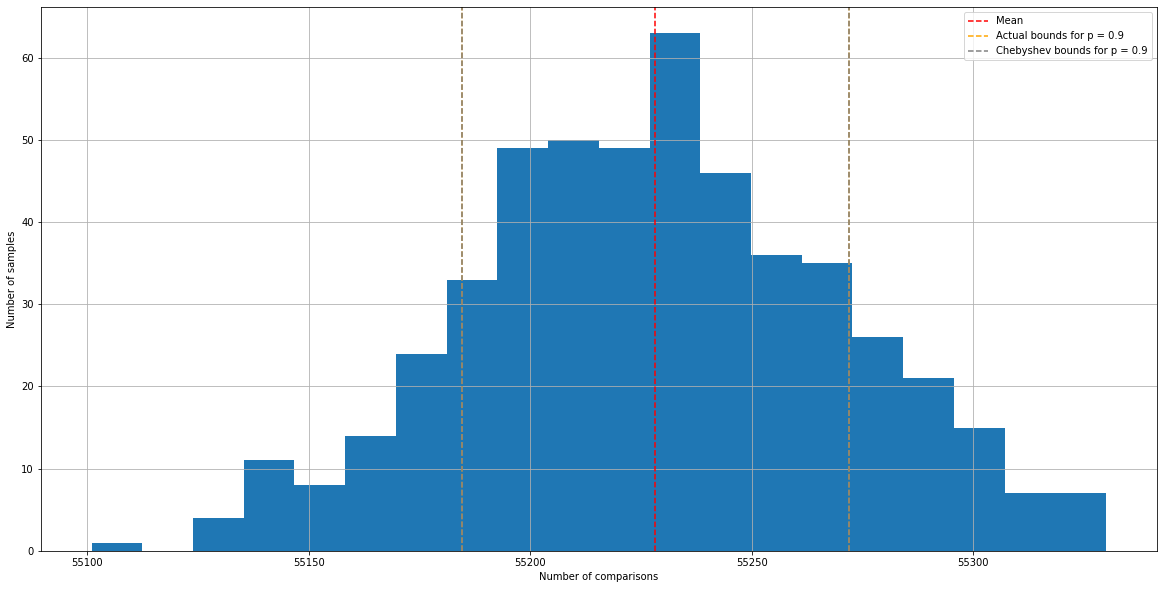

In [18]:
print(f"Var: {ms_analysis[5000]['experimental_var']}")
histogram(5000, ms_measurments, ms_analysis)